In [18]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

# Importing the dependencies

In [19]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Data Curation

In [ ]:
Upload the kaggle.json file

In [38]:
!pip install kaggle
     

In [31]:
kaggle_credentails = json.load(open("kaggle.json"))

In [32]:
import json

# Load Kaggle credentials from a JSON file
kaggle_credentials = json.load(open("kaggle.json"))


In [33]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]
     

In [46]:
!kaggle datasets download -d sadikaljarif/crop-disease

Dataset URL: https://www.kaggle.com/datasets/sadikaljarif/crop-disease
License(s): MIT
crop-disease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [42]:
# Unzip the downloaded dataset
with ZipFile("crop-disease.zip", 'r') as zip_ref:
    zip_ref.extractall()
     


In [57]:
print(os.listdir("crop-disease/my_data"))

['Anthracnose', 'Apple Scab', 'Black Spot', 'Blight', 'Blossom End Rot', 'Botrytis', 'Brown Rot', 'Canker', 'Cedar Apple Rust', 'Clubroot', 'Crown Gall', 'Downy Mildew', 'Fire Blight', 'Fusarium', 'Gray Mold', 'Leaf Spots', 'Mosaic Virus', 'Nematodes', 'Powdery Mildew', 'Verticillium']


In [64]:
print(len(os.listdir("crop-disease/my_data")))
print(os.listdir("crop-disease/my_data")[:5])

print(len(os.listdir("crop-disease/my_data")))
print(os.listdir("crop-disease/my_data")[:5])

print(len(os.listdir("crop-disease/my_data")))
print(os.listdir("crop-disease/my_data")[:5])

20
['Anthracnose', 'Apple Scab', 'Black Spot', 'Blight', 'Blossom End Rot']
20
['Anthracnose', 'Apple Scab', 'Black Spot', 'Blight', 'Blossom End Rot']
20
['Anthracnose', 'Apple Scab', 'Black Spot', 'Blight', 'Blossom End Rot']


# Number of Classes

In [67]:

print(len(os.listdir("crop-disease/my_data/Mosaic Virus")))
print(os.listdir("crop-disease/my_data/Black Spot")[:5])

192
['000fa86c-1347-4ca1-9d6e-64f673f21f61.jpg', '030de2e7-3fe4-4f39-b53a-6be05b3ce64e.jpg', '03f17311-c932-4b70-a92f-2444b89f211e.jpg', '05cc1dbf-0be1-4b7a-b9fa-69f8ea1e4aca.jpg', '069fa9da-015f-4a4a-bb41-d95caa0b8553.jpg']


# Data Preprocessing

In [89]:

# Dataset Path
base_dir = 'crop-disease/my_data'

(1600, 1155, 3)


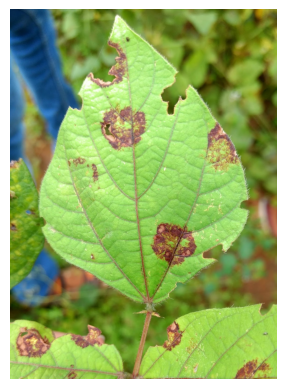

In [90]:

image_path = r"C:\Users\ashut\Downloads\Machine Learning\Crop Disease Identification\crop-disease\my_data\Anthracnose\dc0b6296-4511-4cea-be93-2cdd3cd8439f.jpg"

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [91]:
image_path = r"C:\Users\ashut\Downloads\Machine Learning\Crop Disease Identification\crop-disease\my_data\Anthracnose\dc0b6296-4511-4cea-be93-2cdd3cd8439f.jpg"


# Read the image
img = mpimg.imread(image_path)

print(img)

[[[  8  41  74]
  [  9  42  75]
  [  9  42  75]
  ...
  [134 142  41]
  [132 143  41]
  [132 143  41]]

 [[  8  41  74]
  [  8  41  74]
  [  8  41  74]
  ...
  [134 142  39]
  [131 142  40]
  [131 142  40]]

 [[  8  41  74]
  [  6  39  72]
  [  4  37  70]
  ...
  [133 141  38]
  [133 141  38]
  [132 140  37]]

 ...

 [[166 214 105]
  [169 217 108]
  [172 220 110]
  ...
  [165 177  77]
  [165 177  75]
  [165 177  75]]

 [[169 217 108]
  [169 217 108]
  [172 220 110]
  ...
  [161 180  73]
  [158 182  72]
  [159 183  73]]

 [[167 215 106]
  [163 211 102]
  [167 215 105]
  ...
  [156 180  70]
  [153 181  68]
  [153 181  68]]]


In [92]:
# Image Parameters
img_size = 224
batch_size = 32

# Train Test Split

In [94]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [95]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 2994 images belonging to 20 classes.


In [96]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)
     

Found 739 images belonging to 20 classes.


# Convolutional Neural Network

In [97]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))
     


C:\Users\ashut\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [98]:
# model summary
model.summary()
     

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           5,140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,800,532 (182.34 MB)

 Trainable params: 47,800,532 (182.34 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
     

# Model Traning 

In [100]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5


C:\Users\ashut\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/93 ━━━━━━━━━━━━━━━━━━━━ 1:24 1s/step - accuracy: 0.0630 - loss: 7.9484

C:\Users\ashut\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


93/93 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.0749 - loss: 5.1769 - val_accuracy: 0.1128 - val_loss: 2.8710
Epoch 2/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0938 - loss: 2.9131 - val_accuracy: 0.0000e+00 - val_loss: 3.0754
Epoch 3/5


C:\Users\ashut\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


93/93 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.2482 - loss: 2.5860 - val_accuracy: 0.2011 - val_loss: 2.7122
Epoch 4/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2500 - loss: 2.4398 - val_accuracy: 0.6667 - val_loss: 1.4886
Epoch 5/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.5715 - loss: 1.5758 - val_accuracy: 0.2337 - val_loss: 2.9783


# Model Evaluation

In [101]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
     

Evaluating model...
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 513ms/step - accuracy: 0.2252 - loss: 2.9214
Validation Accuracy: 23.37%


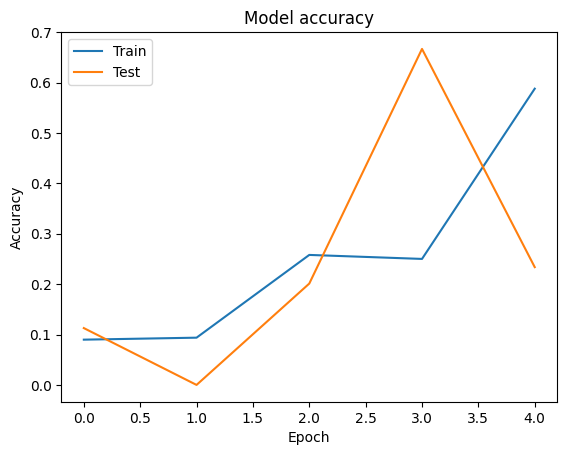

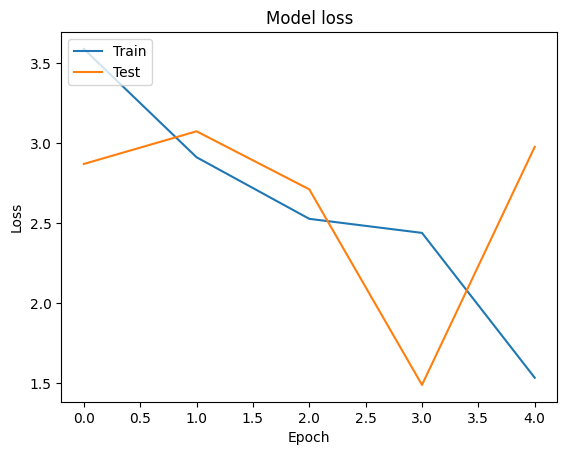

In [102]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [103]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [104]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}
     

In [105]:
class_indices

{0: 'Anthracnose',
 1: 'Apple Scab',
 2: 'Black Spot',
 3: 'Blight',
 4: 'Blossom End Rot',
 5: 'Botrytis',
 6: 'Brown Rot',
 7: 'Canker',
 8: 'Cedar Apple Rust',
 9: 'Clubroot',
 10: 'Crown Gall',
 11: 'Downy Mildew',
 12: 'Fire Blight',
 13: 'Fusarium',
 14: 'Gray Mold',
 15: 'Leaf Spots',
 16: 'Mosaic Virus',
 17: 'Nematodes',
 18: 'Powdery Mildew',
 19: 'Verticillium'}

In [112]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))
     

In [116]:
# Example Usage
image_path = r"C:\Users\ashut\Downloads\Machine Learning\Crop Disease Identification\crop-disease\my_data\Anthracnose\d944af50-7621-43e6-a3bf-bcec55a4377c.JPG"
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
Predicted Class Name: Anthracnose
